In [151]:
%matplotlib inline

In [152]:
import matplotlib.pyplot as plt
import numpy as np

In [153]:
import logreg as lr  ## created a .py file to do cleanup and run basic models.   
#jupyter seems better for playing with the models once we have them.

In [154]:
reload(lr)

<module 'logreg' from 'logreg.py'>

In [155]:
df, linmodel, logmodel = lr.analyze_it() # get the models from the import

Optimization terminated successfully.
         Current function value: 0.319276
         Iterations 8
FICO.Score          -0.087480
Amount.Requested     0.000174
constant            60.171952
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  IR_TF   No. Observations:                 2498
Model:                          Logit   Df Residuals:                     2495
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Feb 2016   Pseudo R-squ.:                  0.5245
Time:                        20:37:44   Log-Likelihood:                -797.55
converged:                       True   LL-Null:                       -1677.4
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

In [156]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2389.
Date:                Sun, 28 Feb 2016   Prob (F-statistic):               0.00
Time:                        20:37:44   Log-Likelihood:                 5724.1
No. Observations:                2498   AIC:                        -1.144e+04
Df Residuals:                    2495   BIC:                        -1.142e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7299      0.010     73.765      0.000         0.710     0.749
x1            -0.0009    1.4e-05    -63.059      0.000        -0.001    -0.001
x2          2.108e-06    6.3e-08     33.457      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.899   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.457
Skew:                           0.380   Prob(JB):                     9.19e-18
Kurtosis:                       3.421   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
linmodel.params

array([  7.29878535e-01,  -8.85938963e-04,   2.10849891e-06])

In [158]:
k = linmodel.params[0] + 750 * linmodel.params[1] + 10000 * linmodel.params[2]

In [159]:
k

0.086509301836341659

In [160]:
 # so rate looks fine when I manually calculate - same with predict is ridiculous

In [161]:
linmodel.predict([750,10000,1])

array([ 538.54951367])

In [162]:
linmodel.predict([1,750,10000])  # The constant has to come first here

array([ 0.0865093])

In [163]:
#p(x) = 1/(1 + e^(intercept + 0.087423(FicoScore) − 0.000174(LoanAmount))
logmodel.params

FICO.Score          -0.087480
Amount.Requested     0.000174
constant            60.171952
dtype: float64

In [164]:
pir = 1/(1 + np.e**(60.171952 - 0.087480 * 750 + 0.000174 * 10000))

In [165]:
pir

0.9758269762042282

In [166]:
# I think this is giving me the probability that given these values IR_TF will evaluate true

In [167]:
logmodel.predict([750,10000,1])  # again I think the constant has to come first.

array([ 0.02409667])

In [168]:
logmodel.predict([1, 750,10000])

array([ 1.])

In [169]:
pir2 = 1/(1 + np.e**(logmodel.params[2] + logmodel.params[0] * 718 + logmodel.params[1] * 10000))

In [170]:
pir2  # just backing into minimum FICO here at 718 must be a function to do this too I think.

0.71134550695330911

In [171]:
[logmodel.params[index] for index, parm in enumerate(logmodel.params)]

[-0.087480062439971293, 0.00017368053829337098, 60.171951639224886]

In [172]:
# here's the function called for in the exercise

def loan_approver(logmodel_params, ficoscore, loanamt):
    loan_odds = 1/(1 + np.e**(logmodel.params[2] + logmodel.params[0] * ficoscore + logmodel.params[1] * loanamt))
    if loan_odds >= .7:
        return True
    else: 
        False 

In [173]:
loan_flag = loan_approver(logmodel.params, 750, 10000) # testing the function

In [174]:
loan_flag

True

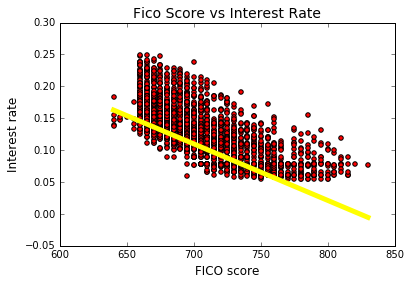

In [175]:
# use pyplot's factory functions...
fig, ax = plt.subplots()

ax.set_title("Fico Score vs Interest Rate",fontsize=14)
ax.set_xlabel("FICO score",fontsize=12)
ax.set_ylabel("Interest rate",fontsize=12)

plt.scatter(df['FICO.Score'],df['Interest.Rate'], c='red')

# set linear regression data and plot
domain = [df['FICO.Score'].min(), df['FICO.Score'].max()]
predictions = linmodel.params[0] + np.array(domain) * linmodel.params[1]
plt.plot(domain, predictions, c='Yellow', linewidth=5)

plt.show() # suppresss messages

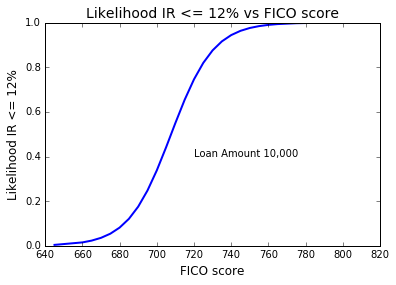

In [177]:
# use pyplot's factory functions...
fig, ax = plt.subplots()

ax.set_title("Likelihood IR <= 12% vs FICO score",fontsize=14)
ax.set_xlabel("FICO score",fontsize=12)
ax.set_ylabel("Likelihood IR <= 12%",fontsize=12)
plt.text(720, .4, 'Loan Amount 10,000')

#set log regression and plot # We have to convert the x and y values to numpy arrays 
# have to sort the data or the values zig zag and we can't see the line
df.sort_values(by=['FICO.Score','Amount.Requested'], ascending = True, inplace = True)
ndf = df[df['Amount.Requested'] == 10000]  # limit the data frame to loan amount of 10,000

# convert xs and ys to numpy array
logxs = np.array(ndf['FICO.Score'])
logamount = np.array(ndf['Amount.Requested'])

# We don't need list iteration here.  Pandas is smart enough to figure out we want to do this for the series
logys = 1/(1 + np.e**(logmodel.params[2] + logmodel.params[0] * logxs + logmodel.params[1] * logamount))

plt.plot(logxs, logys, c='Blue', linewidth=2)
plt.show()